In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_final = pd.read_csv('encoded_css_data2.csv')
df_final.drop(columns=['selector'],inplace=True)
df_final.head()

,padding,font-size,display_ block,display_ flex,display_ grid,display_ inline-block,display_ inline-flex,display_ list-item,display_ none,display_ table,...,color_ var(--text-color),color_ var(--text-color-2),color_ var(--text-color-3),color_ var(--text-color-light),color_ var(--title-color),color_ var(--title-color-style2),color_ var(--warning-color),color_ var(--wh-color),color_ white,color_#000000
0,0.0,16.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.0,16.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0.0,16.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.0,16.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,16.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [2]:
X = df_final.drop('padding', axis=1)  # Features
y = df_final['padding']                # Target variable  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = joblib.load("padding_predictor_model.pkl")

In [3]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [4]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [5]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 33272781912.36345
Mean Squared Error: 2.5241378763432533e+23


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Assuming y_true are the actual values and y_pred are the predicted values from the model
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

# 3. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.4f}')

Mean Squared Error: 252413787634325329543168.0000
Mean Absolute Error: 33272781912.3634
R²: -2027766041780422967296.0000


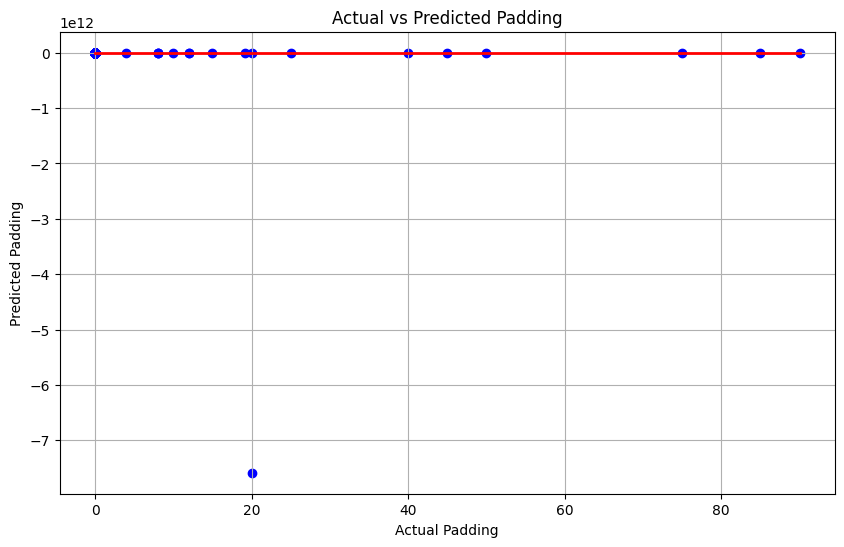

In [7]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.xlabel('Actual Padding')
plt.ylabel('Predicted Padding')
plt.title('Actual vs Predicted Padding')
plt.grid()
plt.show()

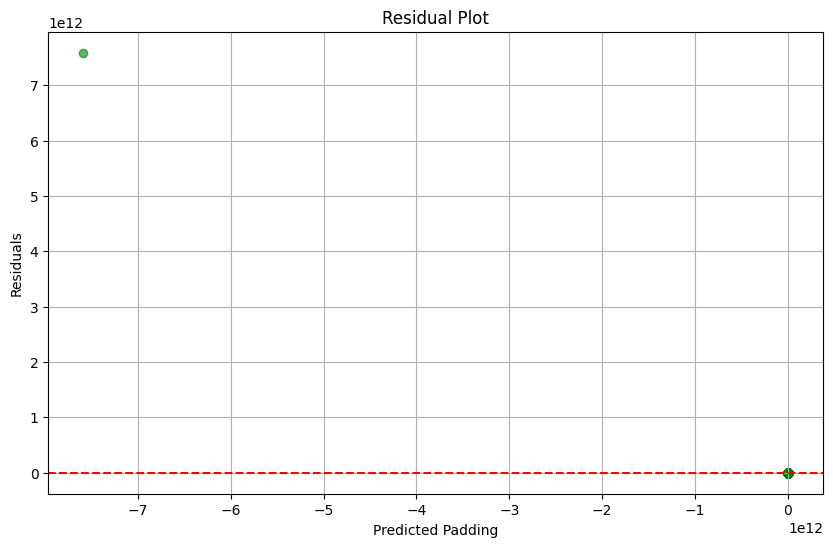

In [8]:
# Calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Padding')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()